In [ ]:
import matplotlib.pyplot as plt
from gaiaxpy import calibrate
import numpy as np

id = 38655544960  # first entry
# id = 2947050466531872640   # Paper Fig. 22
# id = 2947047202356748672

sampling = np.arange(336, 1021, 2)
# sampling = np.arange(336, 1021, 10)

data, _ = calibrate([id], sampling=sampling, save_file=False)

In [ ]:
for i in range(0, 10):
    print(data["flux"][0][i], data["flux_error"][0][i])

2.7223417450630323e-17 5.486930575800605e-18
1.8768246546357385e-17 4.244222763864265e-18
1.4284252010083795e-17 3.461065749096778e-18
1.4117154585423648e-17 3.070883311602755e-18
1.5168027454483018e-17 2.8682955731186513e-18
1.5448562310674292e-17 2.8908843416914818e-18
1.5878278808673546e-17 2.9796044634823803e-18
1.741417034156718e-17 3.200282937657872e-18
1.9448539360506648e-17 3.4727367595505874e-18
1.9327854631324185e-17 3.709802374567571e-18


<ErrorbarContainer object of 3 artists>

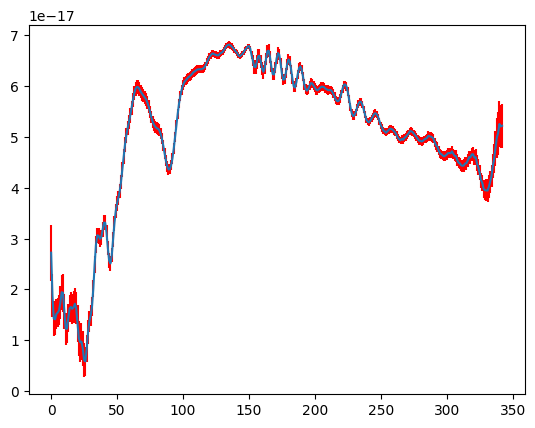

In [ ]:
# plt.plot(data["flux"][0])
plt.errorbar(
    range(len(data["flux"][0])),
    data["flux"][0],
    yerr=data["flux_error"][0],
    ecolor="red",
)

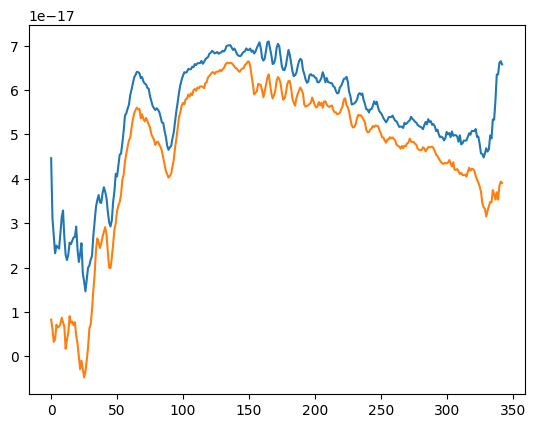

In [ ]:
import torch

max = torch.zeros(343)
min = torch.ones(343)
for i in range(0, 1000):
    sample = torch.normal(
        mean=torch.Tensor(data["flux"][0]), std=torch.Tensor(data["flux_error"][0])
    )
    max = torch.maximum(sample, max)
    min = torch.minimum(sample, min)
plt.plot(max.numpy())
plt.plot(min.numpy())